In [1]:
%matplotlib inline


# Quick start guide


> **[참고문헌]**
>
> - Matplotlib 공식 홈페이지(https://matplotlib.org/stable/tutorials/)
> - 파이썬으로 데이터 시각화하기(https://wikidocs.net/92071)


## 1.1 A simple example

matplotlib는 R의 ggplot2와 달리 별도의 grammar of graphics를 따르지 않고 개별적인 동작 함수들을 이용하여 그래프를 그리는 패키지입니다. 

MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음으로 각각의 함수를 사용하여 간편하게 그래프를 만들고 변화를 줄 수 있습니다.

예를 들어 각각의 함수를 이용해서 그래프 영역을 만들고, 몇 개의 선을 만들고 레이블을 꾸미는 등의 일을 할 수 있습니다. 

우선 사용할 패키지, matplotlib의 패키지를 불러옵니다.


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

matplotlib은 여러분의 데이터를 figure(형태)와 axes(축)을 기준으로 화면 위에 그래프로 나타냅니다. 가장 간단한 방법은 `pyplot.subplots()`와 `Axes.plot`를 이용하여 축 위에 여러 데이터를 그려볼 수 있습니다. 

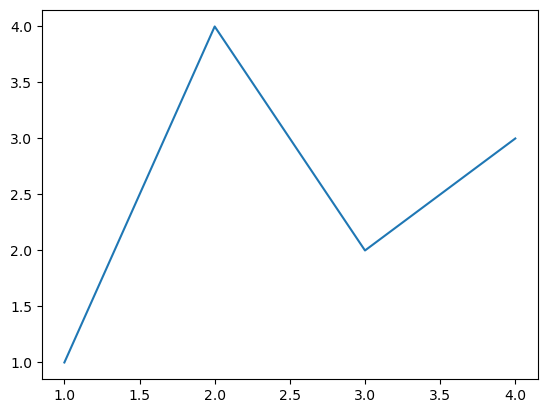

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

### 구성 요소

![matplotlib](image/matplotlib_quick_guide.png)



**`Figure`**

Figure는 데이터 시각화를 위한 도화지와 같은 역할을 합니다. Figure는 여러 개의 하위 그래프인 "Axes"와 특별한 요소인 "titles, figure legends, colorbars" 등을 포함하는 그룹입니다. 또한, Figure 안에는 중첩된 서브피규어(subfigure)도 포함될 수 있습니다. 즉, Figure는 시각화 요소들을 모아놓은 컨테이너 역할을 하며, 여러 개의 하위 그래프와 특수한 아티스트 요소들을 포함할 수 있습니다. 전체적인 플랏 객체를 담는 figure() 메소드는 모든 하위 플랏 요소를 포함하며 여러 개의 그래프 생성 요소를 포함하는 객체를 생성합니다. 


새로운 그림은 만드는 가장 쉬운 방법은 pyplot을 사용하는 것입니다. 

**`작성 예시`**

```python
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right_bottom]])
```

보통 figure와 함께 axes를 함께 생성하는 것이 편리하지만, 나중에 수동으로 axes를 추가할 수도 있습니다. 

많은 matplotlib 백엔드가 그림 창에서 확대/축소 및 패닝을 지원함

**`AXES`**

Axes는 figure에 연결된 미학 객체(artist)로, 데이터를 그리는 영역을 포함하고 있으며 일반적으로 두 개의 축(Axis)(3D의 경우 세 개의 축)에 데이터의 스케일을 나타내기 위한 눈금과 눈금 레이블을 제공합니다. 각 Axes는 set_title()을 통해 제목을, set_xlabel()을 통해 x 레이블을, set_ylabel()을 통해 y레이블을 가질 수 있습니다. 

Axes 클래스와 그 멤버 함수들은 oop 인터페이스와 작업하기 위한 주요 진입점이며, 대부분의 그래프 plotting 메소드들이 이들을 기반으로 정의되어 있습니다. 

Axes는 figure 안에 있는 그래프를 그리기 위한 영역이자 제목과 축 레이블과 같은 여러 요소들을 가지고 있습니다. 




**`Axis`**

축(Axis) 객체는 그래프의 스케일과 범위를 설정하고 눈금(ticks)과 눈금 레이블(ticklabels)을 생성합니다. 

눈금의 위치는 `Locator`, 눈금 레이블 문자열은 `Formatter` 객체에 의해 결정됩니다. 올바른 조합의 Locator와 formatter는 눈금 위치와 레이블을 매우 미세하게 조절할 수 있습니다. 


이와 함께 figure에 나타나는 모든 요소들은 `Artist` 입니다. `figure`, `axes`, `axis`, text, line2d, collections, patch 개체 등도 포함됩니다. 모든 아티스트가 캔버스에 그려집니다. 대부분의 artist는 특정 axes에 속해 있으며, 한 axes에 속한 artist는 다른 axes와 공유되거나 다른 axes로 이동할 수 없습니다. 

### 입력 유형

**(플로팅 함수의 입력 타입)** `numpy.array`, `numpy.ma.masked_array`, `numpy.asarray` 객체를 기대함 

  - 판다스나 넘파이의 행렬(numpy.matrix) 클래스들은 종종 작동되지 않을 수 있음
  - 일반적으로 plot 함수를 적용하기 전에 numpy의 array로 변환


In [4]:
# matrix를 array로 변환하는 코드
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

In [5]:
print(f"Type of b_asarray: {type(b_asarray)}")

Type of b_asarray: <class 'numpy.ndarray'>


Text(0, 0.5, 'entry b')

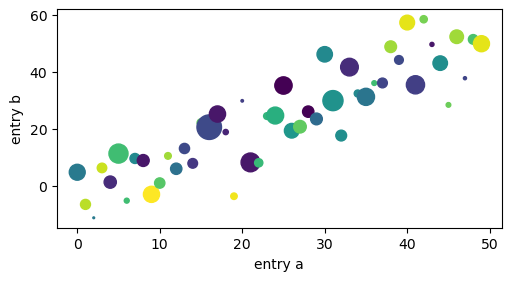

In [6]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

In [7]:
print("Type of data['a']: ", type(data['a']))

Type of data['a']:  <class 'numpy.ndarray'>


In [8]:
print(f"Type of data['b']: {type(data['b'])}")

Type of data['b']: <class 'numpy.ndarray'>



## 1.2 코딩 스타일

### 명시적 인터페이스 vs 암시적 인터페이스

위에서 언급했듯이 Matplotlib를 사용하는 방법에는 기본적으로 두 가지가 있습니다.

Figure와 Axes를 명시적으로 만들고 이에 대한 메서드를 호출합니다( "객체 지향 (OO) 스타일").

pyplot에 의존하여 Figure와 Axes를 암시 적으로 생성하고 관리하며, 플로팅을 위해 pyplot 함수를 사용합니다.


객체지향적 코딩 스타일(Object Oriented-style)

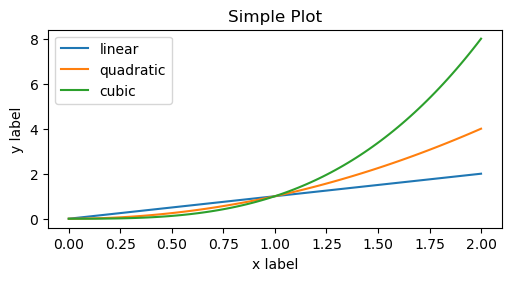

In [9]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

파이플랏(pyplot) 스타일



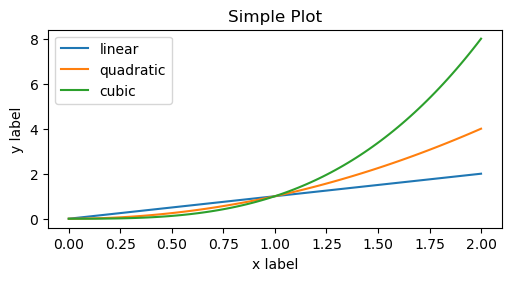

In [10]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

2개의 다른 방법으로 그래프를 그렸지만 동일한 그래프가 생성되었습니다. 

일반적으로 두 방법 모두 그래프를 그리는 데 활용할 수 있지만, 객체지향적 방법이 좀 더 권장되는 편입니다. 복합한 기능을 메소드 형식으로 나타낼 수 있고 재사용이 원활하기 때문입니다.

### 헬퍼 함수 만들기

다른 데이터를 사용하여 동일한 그림을 반복해서 만들어야 하는 경우 재사용이 가능한 헬퍼 함수 **(helper function)** 를 만들어서 활용할 수 있습니다. 

아래의 예시를 보겠습니다.


In [11]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

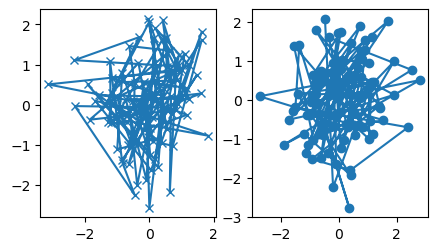

In [12]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

헬퍼 함수를 이용하여 동일한 데이터에 두 개의 그래프를 그릴 수 있었습니다. 

조금 더 많은 템플릿을 사용하고 싶다면 matplotlib의 확장프로그램인 cookiecutter를 참조할 수 있습니다. 
(https://github.com/matplotlib/matplotlib-extension-cookiecutter)


## 스타일링 아티스트

그래프의 심미적 요소를 matplotlib에서는 아티스트(artist)라고 표현합니다. 

이러한 아티스트를 스타일링할 때는 plot() 메소드 내 인자로 입력하거나, set_linestyle() 메소드를 이용할 수 있습니다.



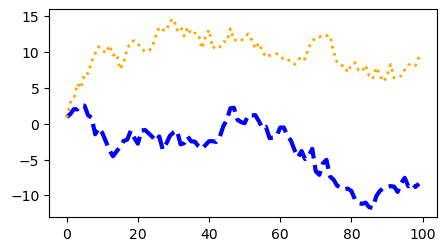

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### 색상

Matplotlib는 매우 다양한 색상을 지원할 수 있습니다. 

그리고 그래프의 구성 요소별로 다른 색상을 지정할 수도 있스빈다. 

아래는 산점도에서 점의 내부를 채우는 색상과 점의 테두리를 그리는 색상을 달리 바꿔보았습니다. 



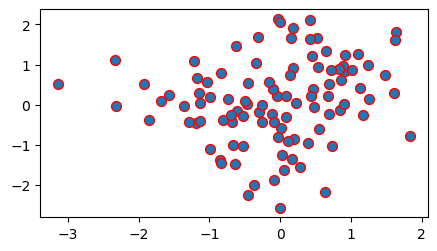

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='r')

### 선폭, 선스타일 및 마커 크기

plot 메소드의 입력 인자를 이용하여 선폭(linewidth), 선스타일(linestyle) 및 마커(marker)를 바꿔볼 수 있습니다.

아래는 마커(marker)를 변경한 예입니다.

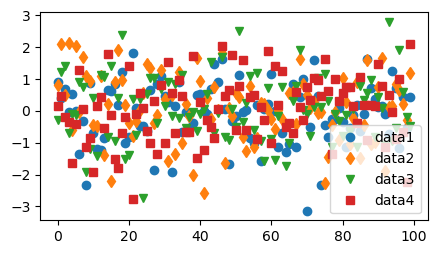

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## 레이블링 플랏

### 축 레이블과 텍스트

- x축 레이블: `~.Axes.set_xlabel`

- y축 레이블: `~.Axes.set_ylabel`

- 표 제목 레이블: `~.Axes.set_title` 

- 텍스트 상자 넣기: `~.Axes.text`



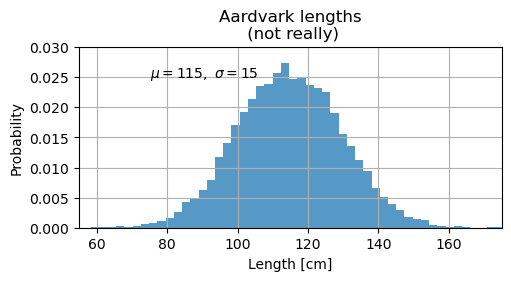

In [17]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)


### 텍스트에서 수학식 사용하기

Matplotlib에서 title 입력 시 마크다운과 레이텍스 문법에 따라 수식을 넣을 수 있습니다. 아래는 예시 코드입니다.

```python
    ax.set_title(r'$\sigma_i=15$')
```

r 뒤부터 TeX 표현식을 인식하는 파서가 텍스트를 수식으로 만들어 줍니다.


### 주석

.annotate() 메소드를 이용하여 필요한 경우 주석을 표시할 수 있습니다.


(-2.0, 2.0)

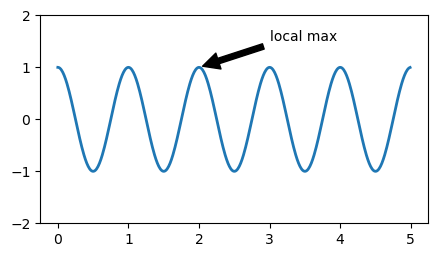

In [16]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)


### 범례

- 범례 입력: `.Axes.legend`



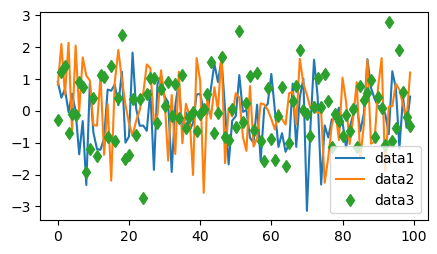

In [18]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

## 축 스케일과 눈금

 `~.axis.Axis` 메소드를 이용하여 각 축의 **scale** , **locators** , **formatters** 를 설정할 수 있습니다.

### 스케일(축척)

선형 스케일, 비선형 스케일, 로그 스케일을 지원하며, 아래의 메소드를 참고하면 좋습니다. 

  - `~.Axes.loglog`
  - `~.Axes.semilogx`
  - `~.Axes.semilogy`.  

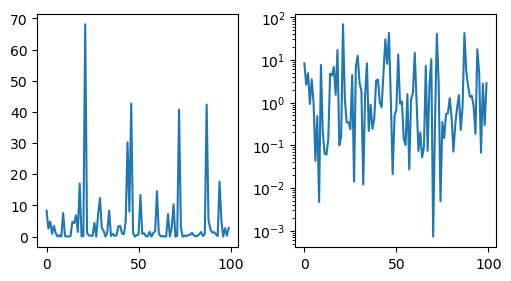

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis. This
happens in both directions, and gets combined into a *transform*, which
is the way that Matplotlib maps from data coordinates to Axes, Figure, or
screen coordinates.  See :doc:`/tutorials/advanced/transforms_tutorial`.

### 눈금 위치 및 형식
각 축의 눈금의 위치와 형식에 대한 인자로 **locator** 와 **formatter**를 사용할 수 있습니다.
`~.Axes.set_xticks`라는 간단한 인터페이스를 제공합니다.



Text(0.5, 1.0, 'Manual ticks')

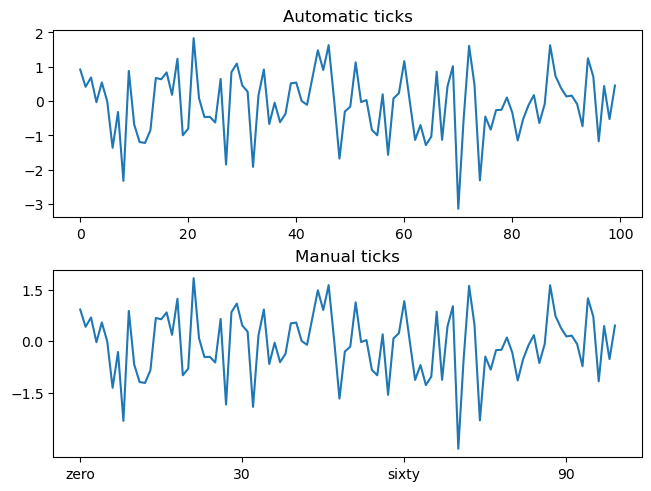

In [20]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

스케일러에 따라 각각의 로케이터와 포맷터가 다를 수 있습니다. 
  - `~.LogLocator`  
  - `~.LogFormatter` 참조

> 참고문헌
>
> - `/gallery/ticks/tick-locators`
>
> - `/gallery/ticks/tick-formatters`



### 날짜 및 문자열 표시

matplotlib은 날짜 배열과 문자열 배열을 처리할 수 있습니다. 이는 축에 적절한 로케이터와 포맷터를 얻습니다. 


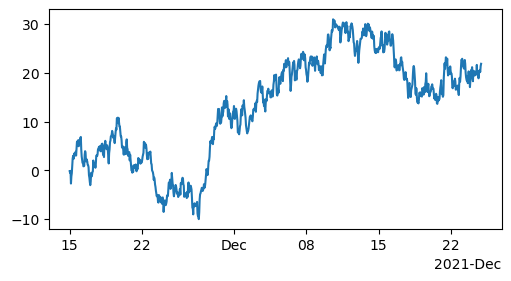

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

더 많은 정보를 알고 싶다면 아래를 참고해 주세요.

> - `/gallery/text_labels_and_annotations/date`
> - `/gallery/lines_bars_and_markers/categorical_variables`



<BarContainer object of 4 artists>

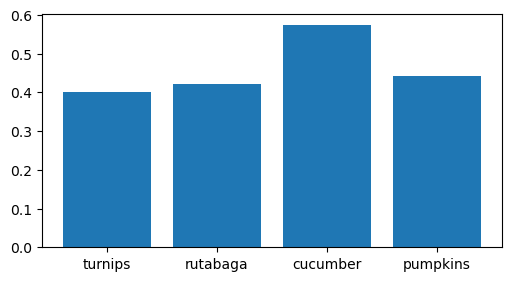

In [22]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

### 축 추가(객체)

서로 다른 스케일의 y축을 삽입하는 방법 
  - `~.Axes.twinx` 이용
  - `~.Axes.twiny` 이용
  - **(참고)** `/gallery/subplots_axes_and_figures/two_scales` 

또 다른 방법 소개
  - `~.Axes.secondary_xaxis`
  - `~.Axes.secondary_yaxis` 
  - **(참고)** `/gallery/subplots_axes_and_figures/secondary_axis`

Text(0.5, 0, 'Angle [°]')

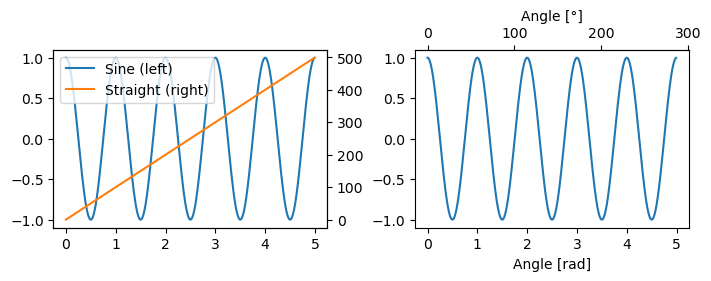

In [23]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## 색상 매핑 데이터 

우리는 정보를 나타내는 세번째 차원으로서 색상을 활용하여 그래프를 그리기도 합니다. 

matplotlib에서 어떻게 색상을 매핑하는 지 아래 예제를 통해 살펴보겠습니다.

Text(0.5, 1.0, 'scatter()')

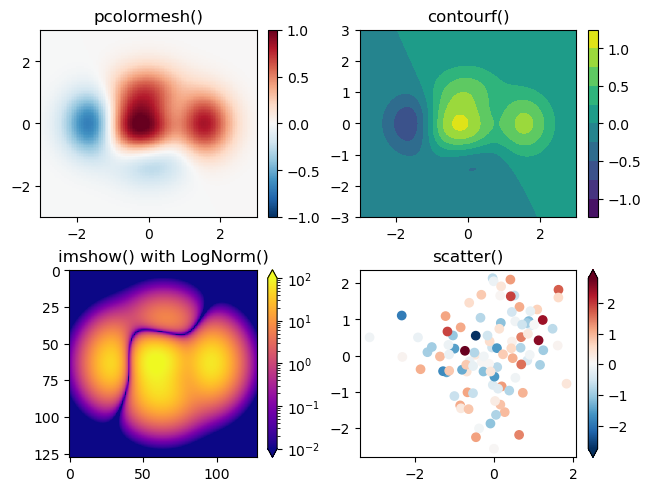

In [24]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### 컬러맵

스칼라 데이터를 RGBA에 매핑하기 위한 혼합 클래스로 `~.ScalarMappable` 기능을 제공함

> **RGBA**: 색상 시스템에서 "R"은 적색 채널 ( "Red"), "G"는 녹색 채널 ( "Green"), "B"는 청색 채널 ( "Blue"), A는 투명도 (Opacity)를 나타냅니다 (예 : rgba(16,110,190,0.7) )

- **(참고)** `/tutorials/colors/colormaps` 
- **(참고)** `/tutorials/colors/colormap-manipulation`) 
- https://matplotlib.org/mpl-third-party/#colormaps-and-styles




### 색상의 정규화

비선형적인 컬러 매핑이 필요할 때는  `LogNorm` 을 사용할 수 있음

  - **(참고)** ``/tutorials/colors/colormapnorms``.



### 컬러바

`~.Figure.colorbar` 를 사용하여 컬러바를 플랏에 추가할 수 있습니다.

  - **(참고)** `/gallery/subplots_axes_and_figures/colorbar_placement` 

## 서브 플랏 그리기

  - 방법 1. figure() 메소드 이용 객체 생성하기 
    > ``fig = plt.figure()``

  - 방법 2. subplots() 메소드 이용 객체 생성하기   
    > ``fig2, ax = plt.subplots()``
   
  - 방법 3. subplots() 함수로 이용하여 객체 생성하기
    > ``plt.subplots()`` 

  - 방법 4. subplot_mosaic 메소드를 이용하여 정교한 하위 플랏 생성하기
    > `~.pyplot.subplot_mosaic`.


Text(0.5, 1.0, 'right')

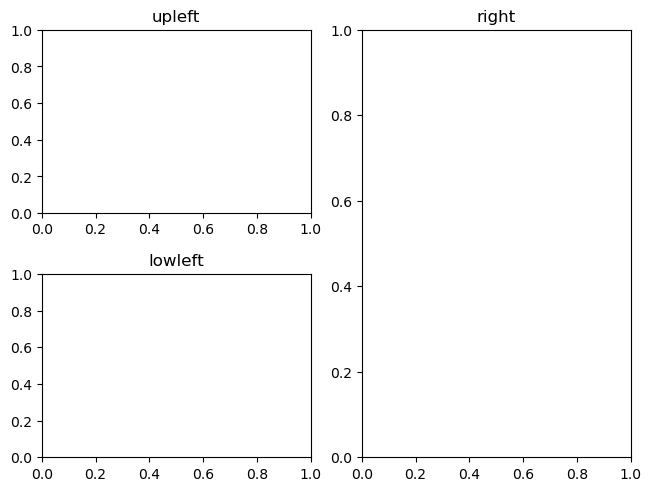

In [25]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

축 배열에 대한 참고 문헌 
  - `/tutorials/intermediate/arranging_axes` 

모자이크(mosaic)에 대한 참고 문헌
  - `/gallery/subplots_axes_and_figures/mosaic`.


# Appendix. mosaic을 이용한 subplot 생성

In [27]:
import matplotlib.pyplot as plt
import numpy as np


# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

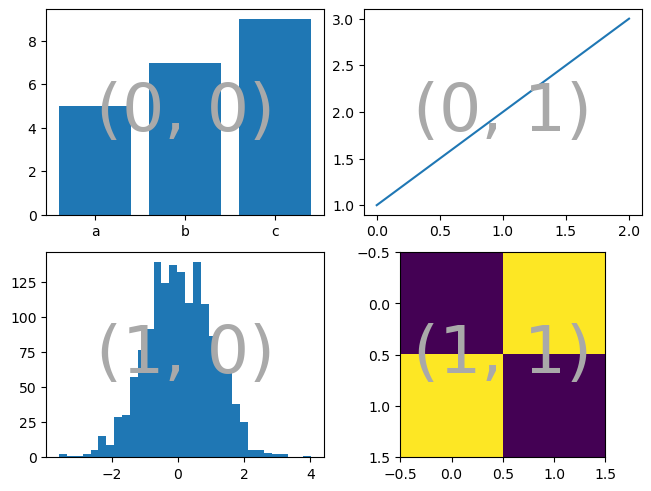

In [28]:
np.random.seed(19680801)
hist_data = np.random.randn(1_500)


fig = plt.figure(layout="constrained")
ax_array = fig.subplots(2, 2, squeeze=False)

ax_array[0, 0].bar(["a", "b", "c"], [5, 7, 9])
ax_array[0, 1].plot([1, 2, 3])
ax_array[1, 0].hist(hist_data, bins="auto")
ax_array[1, 1].imshow([[1, 2], [2, 1]])

identify_axes(
    {(j, k): a for j, r in enumerate(ax_array) for k, a in enumerate(r)},
)

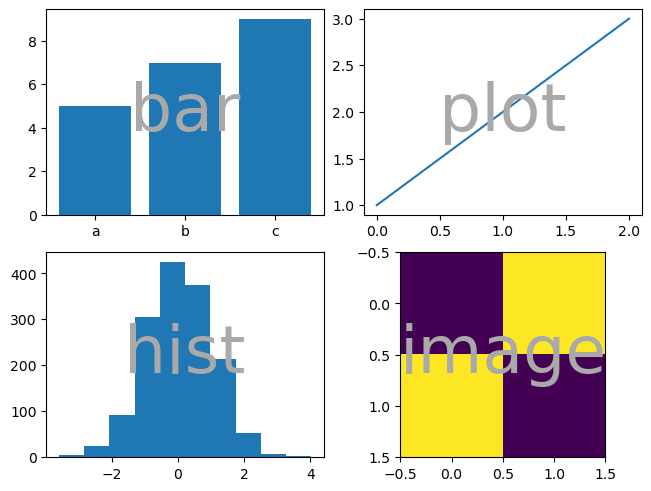

In [29]:
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [
        ["bar", "plot"],
        ["hist", "image"],
    ],
)
ax_dict["bar"].bar(["a", "b", "c"], [5, 7, 9])
ax_dict["plot"].plot([1, 2, 3])
ax_dict["hist"].hist(hist_data)
ax_dict["image"].imshow([[1, 2], [2, 1]])
identify_axes(ax_dict)

In [30]:
print(ax_dict)

{'bar': <Axes: label='bar'>, 'plot': <Axes: label='plot'>, 'hist': <Axes: label='hist'>, 'image': <Axes: label='image'>}


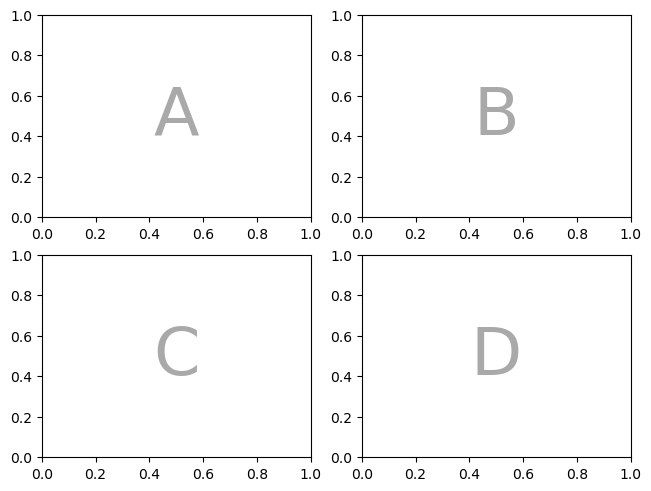

In [31]:
mosaic = """
    AB
    CD
    """

fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(mosaic)
identify_axes(ax_dict)

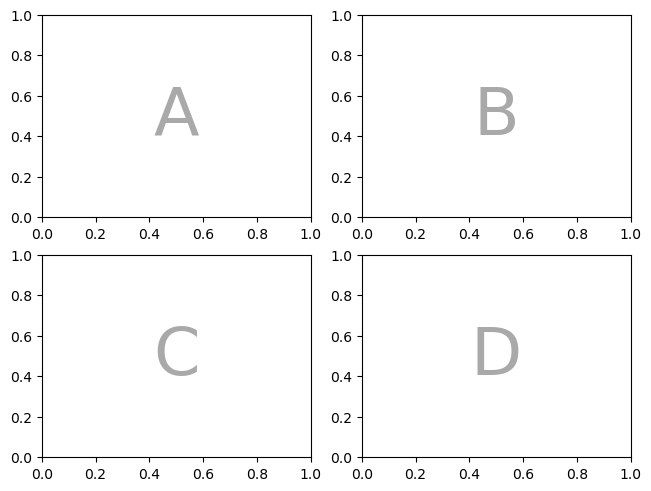

In [32]:
mosaic = "AB;CD"

fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(mosaic)
identify_axes(ax_dict)

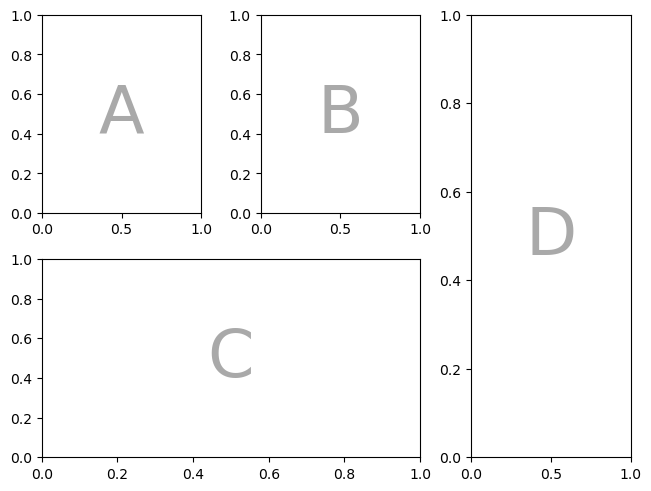

In [33]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABD
    CCD
    """
)
identify_axes(axd)




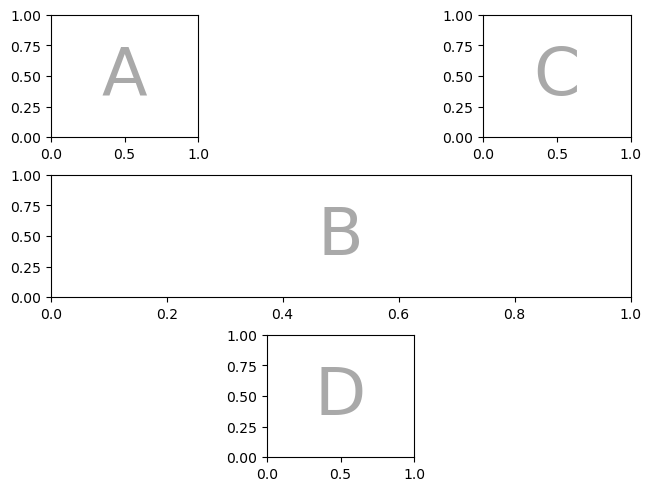

In [34]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    A.C
    BBB
    .D.
    """
)
identify_axes(axd)

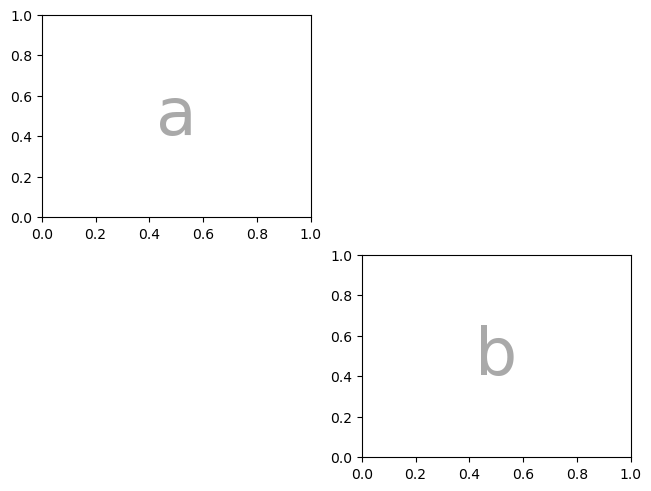

In [35]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    aX
    Xb
    """,
    empty_sentinel="X",
)
identify_axes(axd)

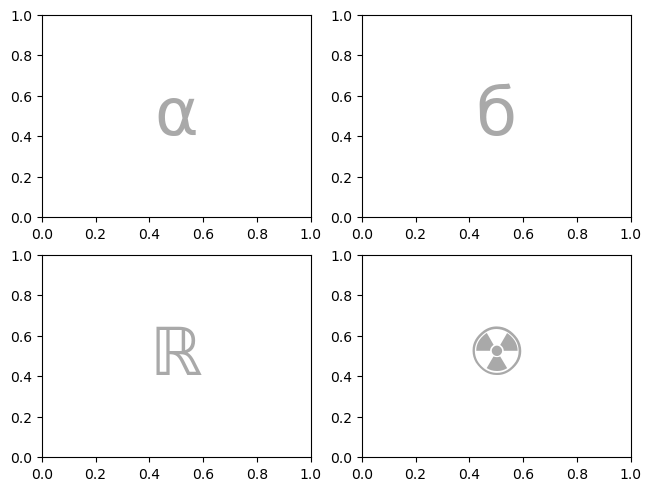

In [36]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """αб
       ℝ☢"""
)
identify_axes(axd)

In [ ]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    .a.
    bAc
    .d.
    """,
    # set the height ratios between the rows
    height_ratios=[1, 3.5, 1],
    # set the width ratios between the columns
    width_ratios=[1, 3.5, 1],
)
identify_axes(axd)

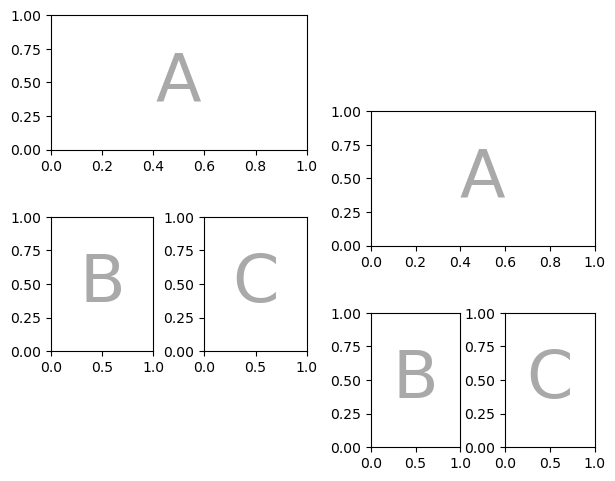

In [37]:
mosaic = """AA
            BC"""
fig = plt.figure()
axd = fig.subplot_mosaic(
    mosaic,
    gridspec_kw={
        "bottom": 0.25,
        "top": 0.95,
        "left": 0.1,
        "right": 0.5,
        "wspace": 0.5,
        "hspace": 0.5,
    },
)
identify_axes(axd)

axd = fig.subplot_mosaic(
    mosaic,
    gridspec_kw={
        "bottom": 0.05,
        "top": 0.75,
        "left": 0.6,
        "right": 0.95,
        "wspace": 0.5,
        "hspace": 0.5,
    },
)
identify_axes(axd)

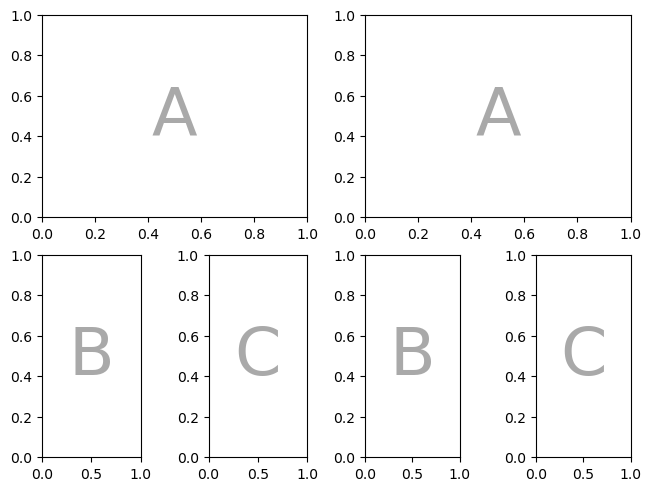

In [38]:
mosaic = """AA
            BC"""
fig = plt.figure(layout="constrained")
left, right = fig.subfigures(nrows=1, ncols=2)
axd = left.subplot_mosaic(mosaic)
identify_axes(axd)

axd = right.subplot_mosaic(mosaic)
identify_axes(axd)